**Loading and Preprocessing of data**

In [2]:
# Let's load the dataset and conduct some exploratory data analysis (EDA) to understand the data, check basic statistics, and detect trends and seasonality.
import pandas as pd

# Load the stock price data uploaded by the user
file_path = '/content/stock_price.csv'
stock_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
stock_data.head(), stock_data.describe()


(         Date  Closing Price  Opening Price  High Price  Low Price  \
 0  01-08-2024          156.3          159.3       159.4      156.1   
 1  31-07-2024          160.4          158.2       160.7      158.1   
 2  30-07-2024          158.7          158.8       159.2      158.0   
 3  29-07-2024          159.7          158.7       160.2      158.4   
 4  26-07-2024          157.9          159.3       159.6      157.9   
 
   Trading Volume Rate of Change %  
 0         79.15M           -2.56%  
 1        173.91M            1.07%  
 2        138.14M           -0.63%  
 3        126.28M            1.14%  
 4        155.08M           -0.13%  ,
        Closing Price  Opening Price   High Price    Low Price
 count    9202.000000    9202.000000  9202.000000  9202.000000
 mean       92.180961      92.256183    93.176451    91.330146
 std        50.452228      50.598215    51.049837    50.087405
 min        33.000000      33.000000    33.200000    32.200000
 25%        52.000000      52.1000

In [3]:
# Convert 'Date' to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%d-%m-%Y')

# Function to convert trading volume based on 'M' or 'B'
def convert_trading_volume(volume_str):
    if 'M' in volume_str:
        return float(volume_str.replace('M', '')) * 1e6  # Convert millions
    elif 'B' in volume_str:
        return float(volume_str.replace('B', '')) * 1e9  # Convert billions
    else:
        return float(volume_str)  # If no M or B, just convert to float

# Apply the conversion to the 'Trading Volume' column
stock_data['Trading Volume'] = stock_data['Trading Volume'].apply(convert_trading_volume)
# Convert 'Rate of Change %' to float by removing '%' and converting to numeric
stock_data['Rate of Change %'] = stock_data['Rate of Change %'].str.replace('%', '').astype(float)

# Set 'Date' as the index for time series analysis
stock_data.set_index('Date', inplace=True)

# Check the updated dataset info to ensure correct data types
stock_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9202 entries, 2024-08-01 to 1987-02-12
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Closing Price     9202 non-null   float64
 1   Opening Price     9202 non-null   float64
 2   High Price        9202 non-null   float64
 3   Low Price         9202 non-null   float64
 4   Trading Volume    9202 non-null   float64
 5   Rate of Change %  9202 non-null   float64
dtypes: float64(6)
memory usage: 503.2 KB


**Statistical Overview of Data**

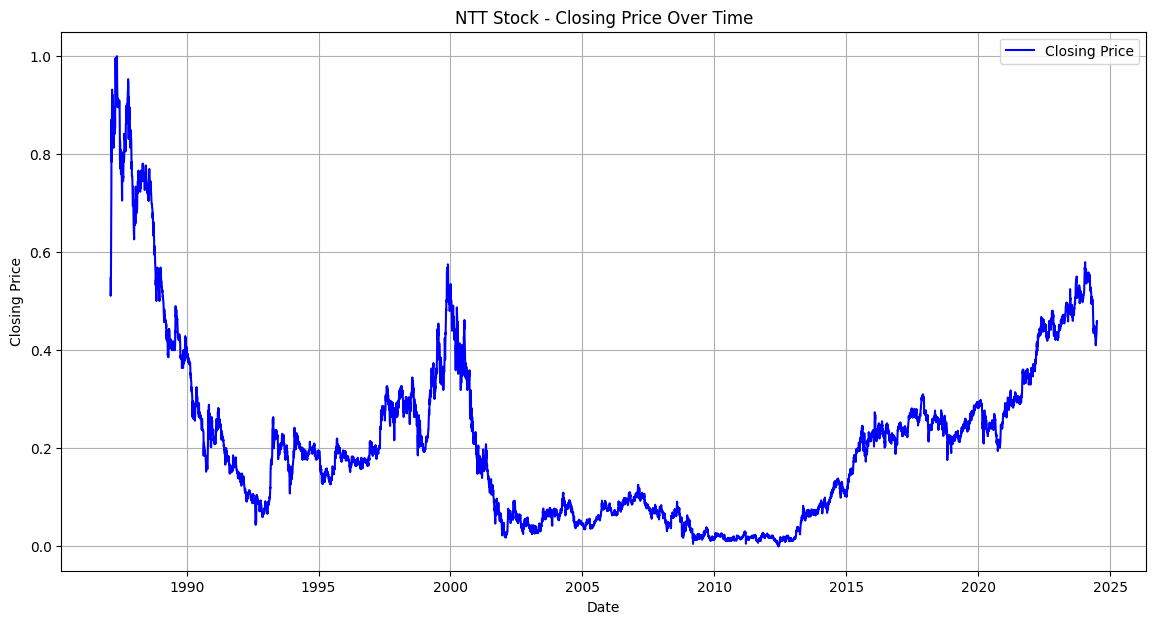

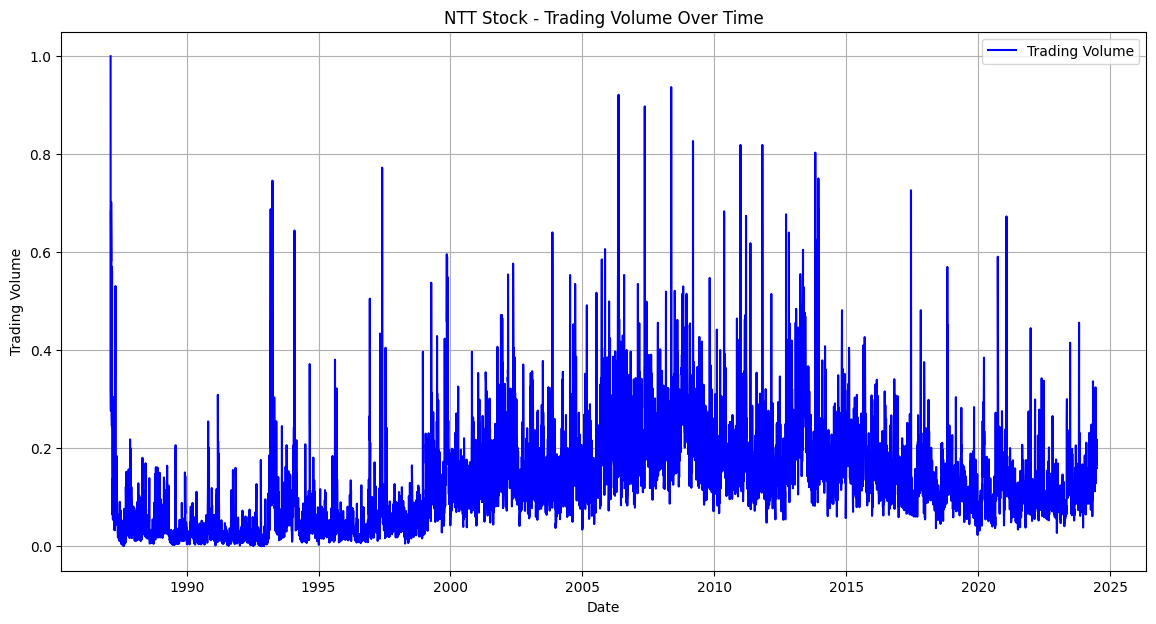

In [43]:
import matplotlib.pyplot as plt

# Plotting the Closing Price to visualize trends
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Closing Price'], label='Closing Price', color='blue')
plt.title('NTT Stock - Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the Closing Price to visualize trends
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Trading Volume'], label='Trading Volume', color='blue')
plt.title('NTT Stock - Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.legend()
plt.grid(True)
plt.show()

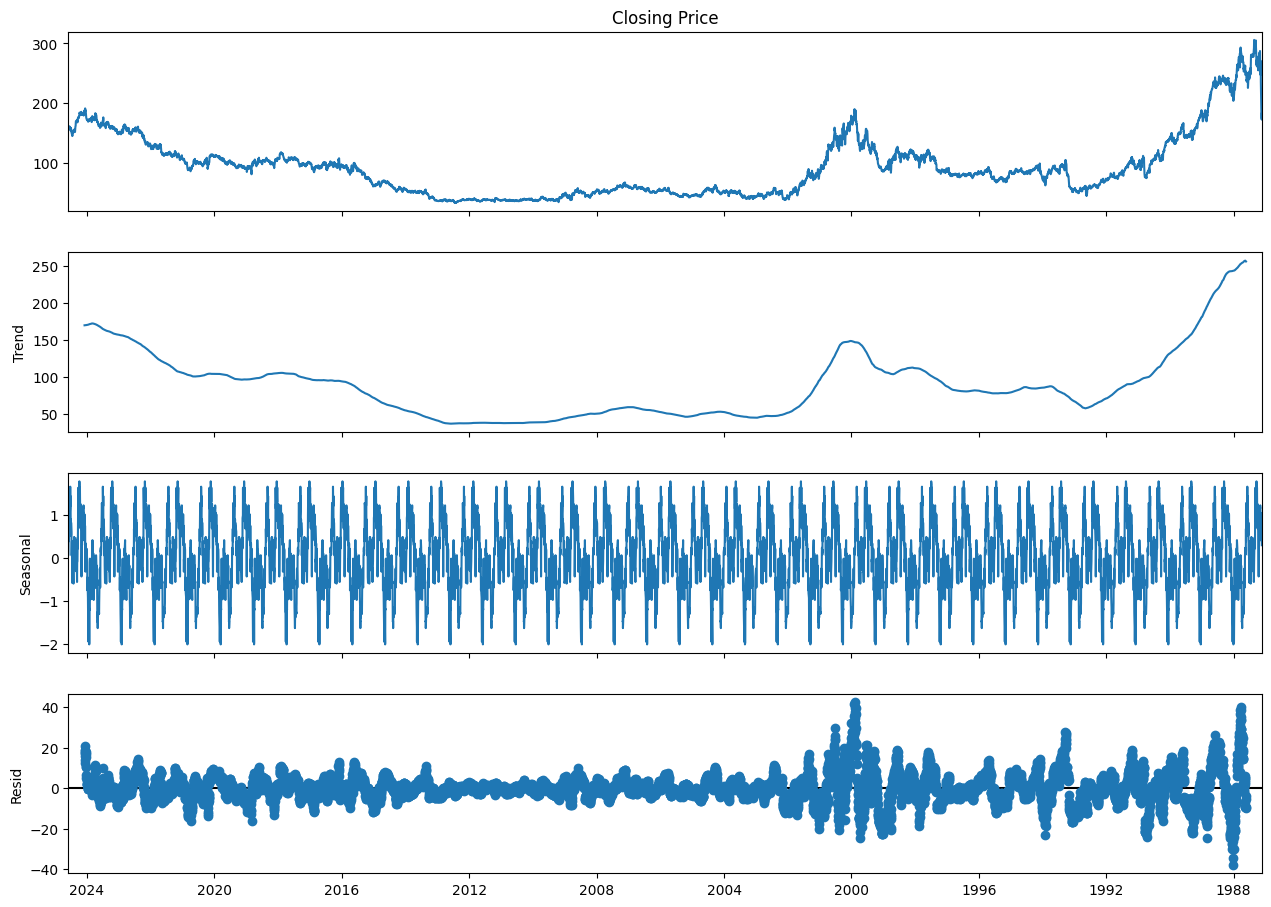

In [6]:
import statsmodels.api as sm

# Decompose the time series to observe trend, seasonality, and residuals (anomalies)
decomposition = sm.tsa.seasonal_decompose(stock_data['Closing Price'], model='additive', period=252) # 252 trading days in a year
decomposition_plot = decomposition.plot()
decomposition_plot.set_size_inches(14, 10)
plt.show()


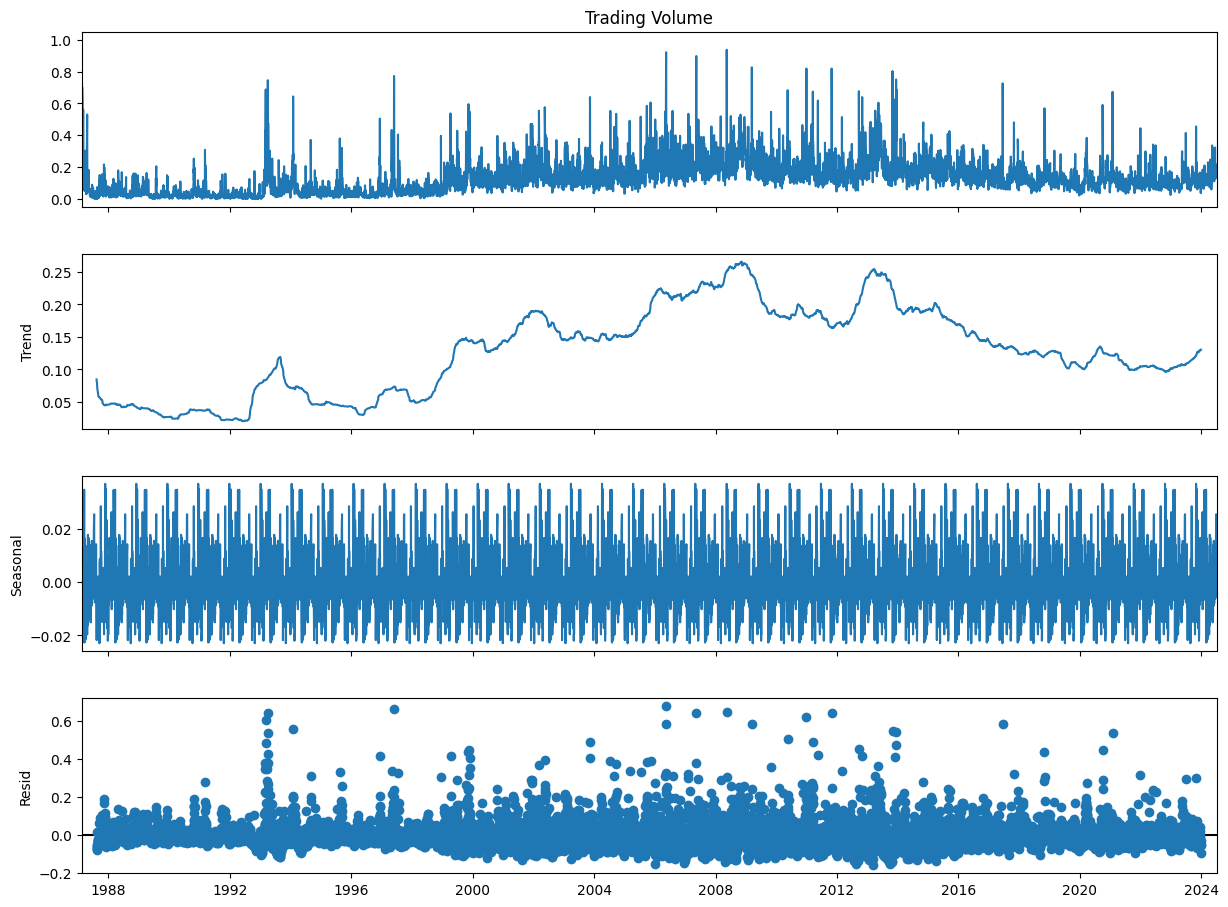

In [44]:
decomposition = sm.tsa.seasonal_decompose(stock_data['Trading Volume'], model='additive', period=252) # 252 trading days in a year
decomposition_plot = decomposition.plot()
decomposition_plot.set_size_inches(14, 10)
plt.show()

**Cleaned DATA**

In [7]:
stock_data

,Closing Price,Opening Price,High Price,Low Price,Trading Volume,Rate of Change %
Date,,,,,,
2024-08-01,156.3,159.3,159.4,156.1,7.915000e+07,-2.56
2024-07-31,160.4,158.2,160.7,158.1,1.739100e+08,1.07
2024-07-30,158.7,158.8,159.2,158.0,1.381400e+08,-0.63
2024-07-29,159.7,158.7,160.2,158.4,1.262800e+08,1.14
2024-07-26,157.9,159.3,159.6,157.9,1.550800e+08,-0.13
...,...,...,...,...,...,...
1987-02-18,191.2,186.3,191.2,186.3,7.950900e+08,4.82
1987-02-17,182.4,176.5,184.3,175.5,8.815100e+08,3.93
1987-02-16,175.5,166.7,175.5,165.7,3.605100e+08,1.74


**Data Processing and Feature Addding**

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Handling Missing Data
# Check for missing data
missing_data = stock_data.isnull().sum()

# Drop rows with missing data (if necessary) or fill with forward fill
stock_data.fillna(method='ffill', inplace=True)

# 2. Normalization & Scaling
# Define the features for scaling
features_to_scale = ['Closing Price', 'Opening Price', 'High Price', 'Low Price', 'Trading Volume']

# Initialize MinMaxScaler for normalization (range 0-1)
scaler = MinMaxScaler()

# Scale the selected features
stock_data[features_to_scale] = scaler.fit_transform(stock_data[features_to_scale])

# 3. Feature Engineering
# Create a new feature: Daily Price Change (Closing Price - Opening Price)
stock_data['Daily Price Change'] = stock_data['Closing Price'] - stock_data['Opening Price']

# Create a new feature: Price Volatility (High Price - Low Price)
stock_data['Price Volatility'] = stock_data['High Price'] - stock_data['Low Price']


# Create moving averages (5-day and 20-day moving averages)
stock_data['MA_5'] = stock_data['Closing Price'].rolling(window=5).mean()
stock_data['MA_20'] = stock_data['Closing Price'].rolling(window=20).mean()

# Forward fill missing values for moving averages
stock_data['MA_5'].ffill(inplace=True)
stock_data['MA_20'].ffill(inplace=True)

# Optionally, you can drop rows with NaN (this will reduce data points)
stock_data.dropna(inplace=True)


# 4. Final dataset after preprocessing and feature engineering
print(stock_data.head())


            Closing Price  Opening Price  High Price  Low Price  \
Date                                                              
2024-07-04       0.456578       0.455202    0.451902   0.460066   
2024-07-03       0.459875       0.447977    0.449749   0.458226   
2024-07-02       0.451447       0.447977    0.444724   0.453073   
2024-07-01       0.451447       0.437500    0.442211   0.445344   
2024-06-28       0.435324       0.429552    0.431802   0.439455   

            Trading Volume  Rate of Change %  Daily Price Change  \
Date                                                               
2024-07-04        0.165977             -0.57            0.001375   
2024-07-03        0.199558              1.47            0.011899   
2024-07-02        0.196394              0.00            0.003471   
2024-07-01        0.217651              2.90            0.013947   
2024-06-28        0.184526              0.33            0.005772   

            Price Volatility      MA_5     MA_20  
Da

<ipython-input-8-39264238248c>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace=True)
<ipython-input-8-39264238248c>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stock_data['MA_5'].ffill(inplace=True)
<ipython-input-8-39264238248c>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in

**Data Frame after adding Features**

In [24]:
stock_data

,Closing Price,Opening Price,High Price,Low Price,Trading Volume,Rate of Change %,Daily Price Change,Price Volatility,MA_5,MA_20
Date,,,,,,,,,,
2024-07-04,0.456578,0.455202,0.451902,0.460066,0.165977,-0.57,0.001375,-0.008164,0.452620,0.459454
2024-07-03,0.459875,0.447977,0.449749,0.458226,0.199558,1.47,0.011899,-0.008477,0.452767,0.459857
2024-07-02,0.451447,0.447977,0.444724,0.453073,0.196394,0.00,0.003471,-0.008350,0.452547,0.459088
2024-07-01,0.451447,0.437500,0.442211,0.445344,0.217651,2.90,0.013947,-0.003133,0.453939,0.458630
2024-06-28,0.435324,0.429552,0.431802,0.439455,0.184526,0.33,0.005772,-0.007653,0.450934,0.457182
...,...,...,...,...,...,...,...,...,...,...
1987-02-18,0.579700,0.553829,0.567121,0.567170,0.618379,4.82,0.025870,-0.000048,0.688164,0.834353
1987-02-17,0.547453,0.518425,0.542355,0.527420,0.686391,3.93,0.029028,0.014935,0.623525,0.816929
1987-02-16,0.522169,0.483020,0.510768,0.491351,0.276368,1.74,0.039149,0.019417,0.579700,0.797710


**Searching the appropiate value of p,d,q for ARIMA using Grid search**

In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import itertools

# Taking trading_volume to forecast
trading_volume = stock_data['Trading Volume']

# Function to determine if the series is stationary and find the optimal d
def determine_d(series):
    d = 0
    while True:
        result = adfuller(series)
        if result[1] <= 0.05:  # p-value <= 0.05 means stationary
            break
        series = series.diff().dropna()  # Difference the series
        d += 1
    return d

# Determine d
d = determine_d(trading_volume)

# Define p and q ranges
p = range(0, 3)  # You can expand this range based on your needs
q = range(0, 3)

# Initialize variables to store the best AIC and parameters
best_aic = np.inf
best_order = None

# Grid search for p, d, q
for param in itertools.product(p, [d], q):
    try:
        model = ARIMA(trading_volume, order=param)
        model_fit = model.fit()
        aic = model_fit.aic
        print(f'ARIMA{param} AIC={aic}')

        # Update best parameters if the AIC is lower than the best found so far
        if aic < best_aic:
            best_aic = aic
            best_order = param

    except Exception as e:
        print(f'ARIMA{param} failed: {e}')

print(f'Best ARIMA order: {best_order} with AIC={best_aic}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

ARIMA(0, 0, 0) AIC=-16491.63739056983


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

ARIMA(0, 0, 1) AIC=-20547.492433691477


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

ARIMA(0, 0, 2) AIC=-22003.599838172115


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

ARIMA(1, 0, 0) AIC=-23714.141680891615


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

ARIMA(1, 0, 1) AIC=-24680.605695168815


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

ARIMA(1, 0, 2) AIC=-24992.84774004609


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

ARIMA(2, 0, 0) AIC=-24232.226838661667


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

ARIMA(2, 0, 1) AIC=-25070.65000271655


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

ARIMA(2, 0, 2) AIC=-25077.73854875485
Best ARIMA order: (2, 0, 2) with AIC=-25077.73854875485


**Build of ARIMA Model**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         Trading Volume   No. Observations:                 7346
Model:                 ARIMA(2, 0, 2)   Log Likelihood                9713.704
Date:                Fri, 11 Oct 2024   AIC                         -19415.409
Time:                        17:46:37   BIC                         -19373.997
Sample:                             0   HQIC                        -19401.174
                               - 7346                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1376      0.025      5.603      0.000       0.089       0.186
ar.L1          1.4879      0.025     58.555      0.000       1.438       1.538
ar.L2         -0.4916      0.025    -19.631      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


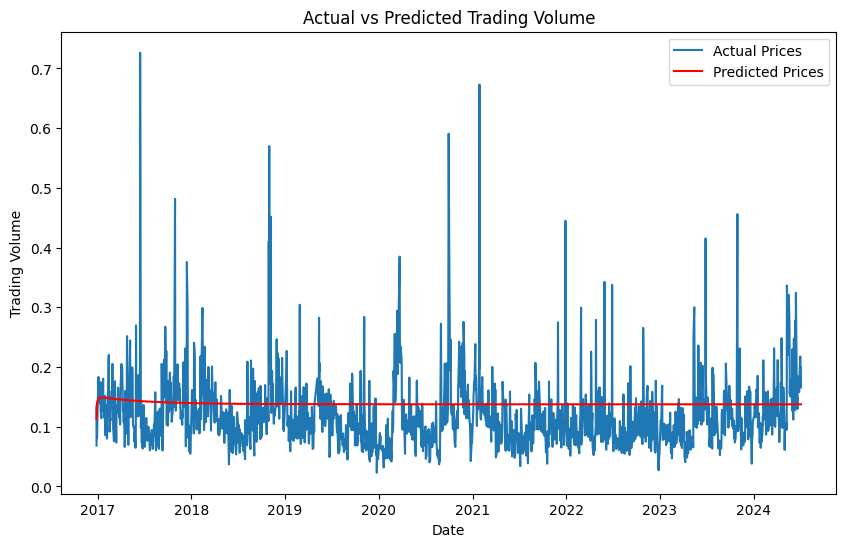

In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Select the 'Closing Price' as the target for prediction
trading_volume = stock_data['Trading Volume']

# Split the data into training and test sets (80% train, 20% test)
train_size = int(len(trading_volume) * 0.8)
train, test = trading_volume[:train_size], trading_volume[train_size:]

# Fit the ARIMA model (you can experiment with different p, d, q values)
model = ARIMA(train, order=(2,0,2))  # (p=2, d=0, q=2) are placeholders, you can tune these values
arima_result = model.fit()

# Print a summary of the model
print(arima_result.summary())

# Forecasting the next values (the length of the test set)
forecast = arima_result.forecast(steps=len(test))

# Evaluate the model performance using Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Prices')
plt.plot(test.index, forecast, color='red', label='Predicted Prices')
plt.title('Actual vs Predicted Trading Volume')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.legend()
plt.show()


**LSTM MODEL**

In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load the dataset
# stock_data = pd.read_csv('your_dataset.csv')  # Uncomment and load your dataset
stock_data = stock_data.iloc[::-1]
# Select all features except 'Trading Volume'
features = stock_data[['Closing Price', 'Opening Price', 'High Price', 'Low Price',
                       'Rate of Change %', 'Daily Price Change',
                       'Price Volatility']].values

# Set 'Trading Volume' as the target variable
target = stock_data['Trading Volume'].values

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Scale the target variable
target_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = target_scaler.fit_transform(target.reshape(-1, 1))

# Prepare data for LSTM
X = []
y = []

# Define the number of time steps (e.g., 60)
time_steps = 60

for i in range(time_steps, len(scaled_features)):
    X.append(scaled_features[i-time_steps:i])
    y.append(scaled_target[i])  # Predicting the scaled 'Trading Volume'

X, y = np.array(X), np.array(y)

# Split into training and test sets (e.g., 80% train, 20% test)
split = int(0.8 * len(X))  # 80% for training
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for 'Trading Volume'

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32)

# Forecasting on the test set
predicted_volume = model.predict(X_test)

# # Inverse transform the predicted values to original scale
# predicted_volume = target_scaler.inverse_transform(predicted_volume)



Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


229/229 ━━━━━━━━━━━━━━━━━━━━ 17s 61ms/step - loss: 0.0102
Epoch 2/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 0.0075
Epoch 3/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0073
Epoch 4/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0077
Epoch 5/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0070
Epoch 6/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - loss: 0.0075
Epoch 7/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0077
Epoch 8/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0070
Epoch 9/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 0.0071
Epoch 10/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0072
Epoch 11/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0071
Epoch 12/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0073
Epoch 13/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0070
Epoch 14/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0066
Epoch 15/30
229/229 ━━━━━━━━━━━━━━━━━━━━

In [47]:
stock_data = stock_data.iloc[::-1]

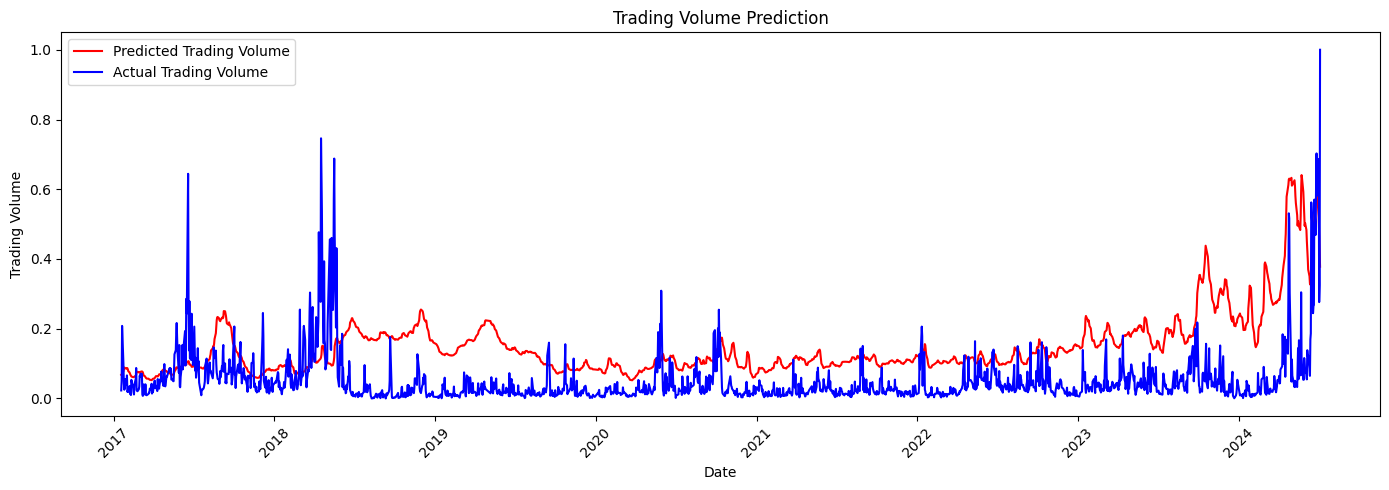

In [48]:
# Plot of the prediction of Trading Volume
plt.figure(figsize=(14, 5))
plt.plot( stock_data.index[split+time_steps:],predicted_volume, color='red', label='Predicted Trading Volume')
plt.plot(stock_data.index[split+time_steps:],y_test, color='blue', label='Actual Trading Volume')

plt.title('Trading Volume Prediction')
plt.xlabel('Date')
plt.ylabel('Trading Volume')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()



In [42]:
# Rescale predictions back to original scale


# Evaluate LSTM model
mse_lstm = mean_squared_error(y_test, predicted_volume)
mae_lstm = mean_absolute_error(y_test, predicted_volume)

print(f'LSTM Model - MSE: {mse_lstm}, MAE: {mae_lstm}')

LSTM Model - MSE: 0.006291339857640848, MAE: 0.05772807002327239


**Comparison of ARIMA and LSTM**

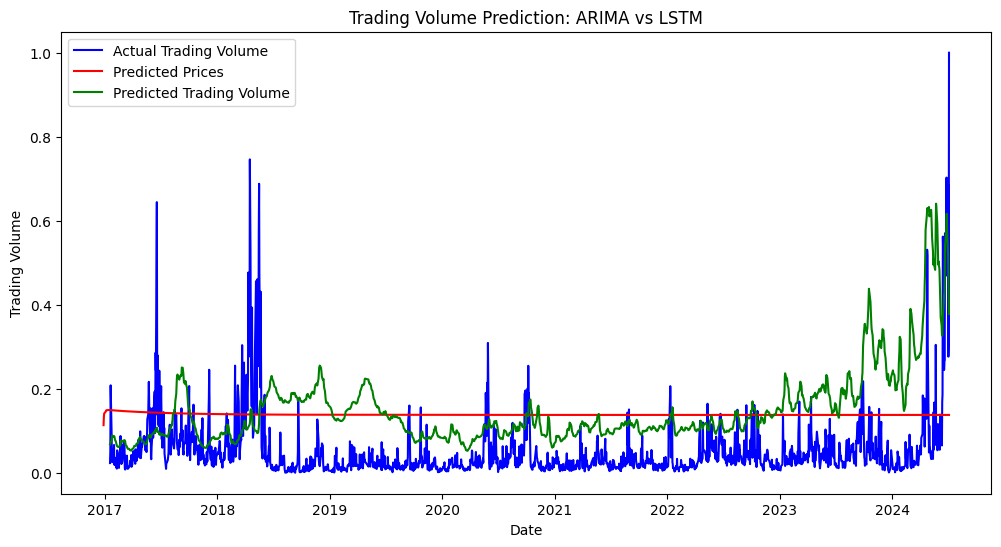

In [50]:
# Plot the actual vs predicted values for ARIMA and LSTM
plt.figure(figsize=(12, 6))

# ARIMA
plt.plot(stock_data.index[split+time_steps:],y_test, color='blue', label='Actual Trading Volume')
plt.plot(test.index, forecast, color='red', label='Predicted Prices')

# LSTM
plt.plot( stock_data.index[split+time_steps:],predicted_volume, color='Green', label='Predicted Trading Volume')

plt.title('Trading Volume Prediction: ARIMA vs LSTM')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.legend()
plt.show()
